In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.svm import LinearSVC, SVC
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.cluster import KMeans
from sklearn_extra.cluster import KMedoids
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
import plotly.express as px

# Linear Regression

### Linear Data

In [2]:
df = pd.read_csv("regression_linear_line.csv")
df.head()

x         y
0 -6.000000  5.766936
1 -5.967419  5.384906
2 -5.934837  5.344283
3 -5.902256  5.486492
4 -5.869674  5.196149

In [3]:
X = df["x"].to_numpy()
y = df["y"].to_numpy()
reg = LinearRegression()
reg.fit(X.reshape(-1, 1), y)

LinearRegression()

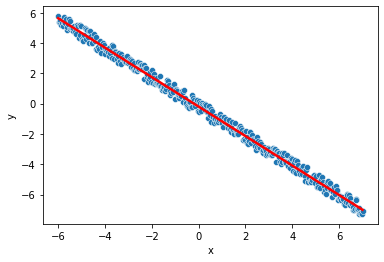

In [4]:
theta = reg.coef_
b = reg.intercept_
sns.scatterplot(x="x", y="y", data=df)
plt.plot(X, theta*X + b, 'r', linewidth=2.5)
plt.show()

### Non-linear Data

In [5]:
df = pd.read_csv("regression_linear_square_root.csv")
df.head()

x         y
0 -6.000000  5.762776
1 -5.967419  5.063231
2 -5.934837  5.222449
3 -5.902256  6.024181
4 -5.869674  6.825703

In [6]:
X = df["x"].to_numpy()
y = df["y"].to_numpy()
reg = LinearRegression()
reg.fit(X.reshape(-1, 1), y)

LinearRegression()

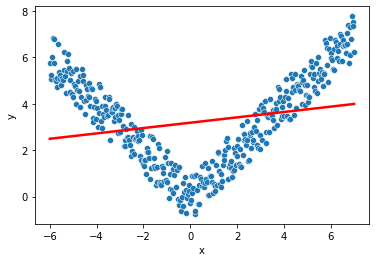

In [7]:
theta = reg.coef_
b = reg.intercept_
sns.scatterplot(x="x", y="y", data=df)
plt.plot(X, theta*X + b, 'r', linewidth=2.5)
plt.show()

# Logistic Regression 

### Linearly Separabe (Uniform)

In [8]:
df = pd.read_csv("classification_linear_uniform.csv")
df.loc[ df["y"] == -1, "y"] = 0 
df.head()

x1        x2  y
0  0.299134  2.291594  1
1  0.700495  0.421917  1
2  3.114521  3.489704  1
3  2.671060  1.629899  1
4  3.035790  1.318322  1

In [9]:
feature_cols = ['x1', 'x2']
X = df[feature_cols].to_numpy()
y = df['y'].to_numpy()
clf = LogisticRegression()
clf.fit(X, y)

LogisticRegression()

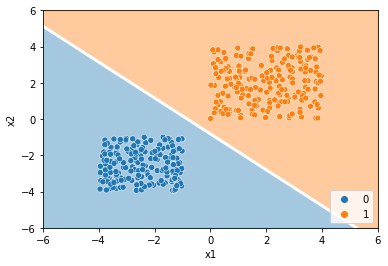

In [10]:
b = clf.intercept_[0]
w1, w2 = clf.coef_.T

b = -b/w2
theta = -w1/w2

xmin, xmax = -6, 6
ymin, ymax = -6, 6
xd = np.array([xmin, xmax])
yd = theta*xd + b
plt.plot(xd, yd,'w', lw=3)
plt.fill_between(xd, yd, ymin, color='tab:blue', alpha=0.4)
plt.fill_between(xd, yd, ymax, color='tab:orange', alpha=0.4)
plt.xlim(xmin, xmax)
plt.ylim(ymin, ymax)
sns.scatterplot(x="x1", y="x2", hue="y", data=df)
plt.legend(loc='lower right')
plt.show()

### Non-linear (XOR)

In [11]:
df = pd.read_csv("classification_nonlinear_xor.csv")
df.loc[ df["y"] == -1, "y"] = 0 
df.head()

x1        x2  y
0  2.415993  4.922784  1
1  4.489238  3.196620  1
2  4.935055  3.699012  1
3  1.589000  2.737612  1
4  2.112737  1.538858  1

In [12]:
feature_cols = ['x1', 'x2']
X = df[feature_cols].to_numpy()
y = df['y'].to_numpy()
clf = LogisticRegression()
clf.fit(X, y)

LogisticRegression()

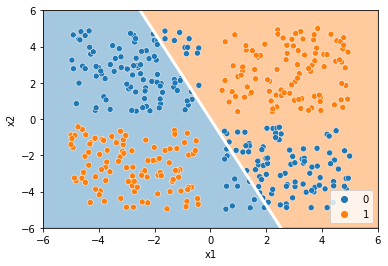

In [13]:
b = clf.intercept_[0]
w1, w2 = clf.coef_.T

b = -b/w2
theta = -w1/w2

xmin, xmax = -6, 6
ymin, ymax = -6, 6
xd = np.array([xmin, xmax])
yd = theta*xd + b
plt.plot(xd, yd,'w', lw=3)
plt.fill_between(xd, yd, ymin, color='tab:blue', alpha=0.4)
plt.fill_between(xd, yd, ymax, color='tab:orange', alpha=0.4)
plt.xlim(xmin, xmax)
plt.ylim(ymin, ymax)
sns.scatterplot(x="x1", y="x2", hue="y", data=df)
plt.legend(loc='lower right')
plt.show()

# Linear SVM

### Linearly Separable (Uniform)

In [14]:
df = pd.read_csv("classification_linear_uniform.csv")
df.loc[ df["y"] == -1, "y"] = 0 
df.head()

x1        x2  y
0  0.299134  2.291594  1
1  0.700495  0.421917  1
2  3.114521  3.489704  1
3  2.671060  1.629899  1
4  3.035790  1.318322  1

In [15]:
feature_cols = ['x1', 'x2']
X = df[feature_cols].to_numpy()
y = df['y'].to_numpy()
clf = LinearSVC()
clf.fit(X, y)

LinearSVC()

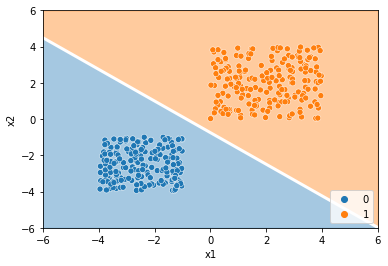

In [16]:
b = clf.intercept_[0]
w1, w2 = clf.coef_.T

b = -b/w2
theta = -w1/w2

xmin, xmax = -6, 6
ymin, ymax = -6, 6
xd = np.array([xmin, xmax])
yd = theta*xd + b
plt.plot(xd, yd,'w', lw=3)
plt.fill_between(xd, yd, ymin, color='tab:blue', alpha=0.4)
plt.fill_between(xd, yd, ymax, color='tab:orange', alpha=0.4)
plt.xlim(xmin, xmax)
plt.ylim(ymin, ymax)
sns.scatterplot(x="x1", y="x2", hue="y", data=df)
plt.legend(loc='lower right')
plt.show()

### Non-linear (XOR)

In [17]:
df = pd.read_csv("classification_nonlinear_xor.csv")
df.loc[ df["y"] == -1, "y"] = 0 
df.head()

x1        x2  y
0  2.415993  4.922784  1
1  4.489238  3.196620  1
2  4.935055  3.699012  1
3  1.589000  2.737612  1
4  2.112737  1.538858  1

In [18]:
feature_cols = ['x1', 'x2']
X = df[feature_cols].to_numpy()
y = df['y'].to_numpy()
clf = LinearSVC()
clf.fit(X, y)

LinearSVC()

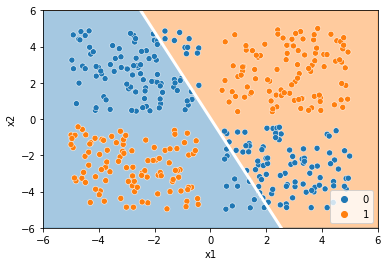

In [19]:
b = clf.intercept_[0]
w1, w2 = clf.coef_.T

b = -b/w2
theta = -w1/w2

xmin, xmax = -6, 6
ymin, ymax = -6, 6
xd = np.array([xmin, xmax])
yd = theta*xd + b
plt.plot(xd, yd,'w', lw=3)
plt.fill_between(xd, yd, ymin, color='tab:blue', alpha=0.4)
plt.fill_between(xd, yd, ymax, color='tab:orange', alpha=0.4)
plt.xlim(xmin, xmax)
plt.ylim(ymin, ymax)
sns.scatterplot(x="x1", y="x2", hue="y", data=df)
plt.legend(loc='lower right')
plt.show()

# Non-linear SVM

### Linearly Separable (Uniform)

In [20]:
df = pd.read_csv("classification_linear_uniform.csv")
df.loc[ df["y"] == -1, "y"] = 0 
df.head()

x1        x2  y
0  0.299134  2.291594  1
1  0.700495  0.421917  1
2  3.114521  3.489704  1
3  2.671060  1.629899  1
4  3.035790  1.318322  1

In [21]:
feature_cols = ['x1', 'x2']
X = df[feature_cols].to_numpy()
y = df['y'].to_numpy()
clf = SVC()
clf.fit(X, y)

SVC()

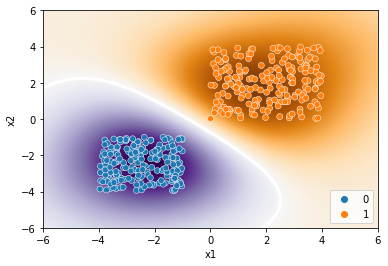

In [22]:
xx, yy = np.meshgrid(np.linspace(-6, 6, 500), np.linspace(-6, 6, 500))

Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.imshow(
    Z,
    interpolation="nearest",
    extent=(xx.min(), xx.max(), yy.min(), yy.max()),
    aspect="auto",
    origin="lower",
    cmap=plt.cm.PuOr_r,
)

contours = plt.contour(xx, yy, Z, levels=[0], linewidths=3, colors="white")
plt.xlim(xmin, xmax)
plt.ylim(ymin, ymax)
sns.scatterplot(x="x1", y="x2", hue="y", data=df)
plt.legend(loc='lower right')
plt.show()

### Non-linear (XOR)

In [23]:
df = pd.read_csv("classification_nonlinear_xor.csv")
df.loc[ df["y"] == -1, "y"] = 0 
df.head()

x1        x2  y
0  2.415993  4.922784  1
1  4.489238  3.196620  1
2  4.935055  3.699012  1
3  1.589000  2.737612  1
4  2.112737  1.538858  1

In [24]:
feature_cols = ['x1', 'x2']
X = df[feature_cols].to_numpy()
y = df['y'].to_numpy()
clf = SVC()
clf.fit(X, y)

SVC()

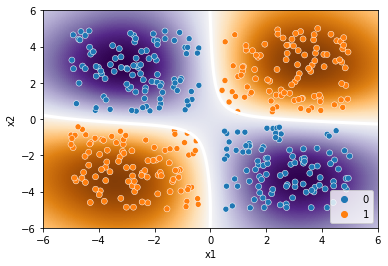

In [25]:
xx, yy = np.meshgrid(np.linspace(-6, 6, 500), np.linspace(-6, 6, 500))

Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.imshow(
    Z,
    interpolation="nearest",
    extent=(xx.min(), xx.max(), yy.min(), yy.max()),
    aspect="auto",
    origin="lower",
    cmap=plt.cm.PuOr_r,
)

contours = plt.contour(xx, yy, Z, levels=[0], linewidths=3, colors="white")
plt.xlim(xmin, xmax)
plt.ylim(ymin, ymax)
sns.scatterplot(x="x1", y="x2", hue="y", data=df)
plt.legend(loc='lower right')
plt.show()

# Neural Network

### Circular Data

In [26]:
df = pd.read_csv("classification_circle.csv")
df.loc[ df["y"] == -1, "y"] = 0 
df.head()

x1        x2  y
0  0.385697  1.235308  1
1  0.528159 -1.781597  1
2  0.935817 -1.414600  1
3  0.232862  0.822633  1
4  0.190594 -1.656273  1

In [27]:
feature_cols = ['x1', 'x2']
X = df[feature_cols].to_numpy()
y = df['y'].to_numpy()
clf = MLPClassifier(activation="tanh", solver='adam', alpha=0.03, hidden_layer_sizes=(4, 2),
                    random_state=42, max_iter=400)
clf.fit(X, y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(activation='tanh', alpha=0.03, hidden_layer_sizes=(4, 2),
              max_iter=400, random_state=42)

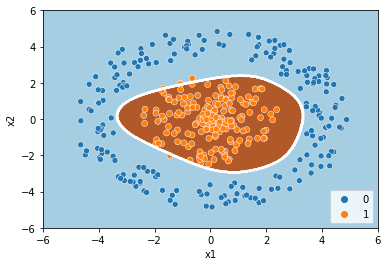

In [28]:
xx, yy = np.meshgrid(np.linspace(-6, 6, 500), np.linspace(-6, 6, 500))

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.imshow(
    Z,
    interpolation="nearest",
    extent=(xx.min(), xx.max(), yy.min(), yy.max()),
    aspect="auto",
    origin="lower",
    cmap=plt.cm.Paired
)

contours = plt.contour(xx, yy, Z, linewidths=2, colors="white")
plt.xlim(xmin, xmax)
plt.ylim(ymin, ymax)
sns.scatterplot(x="x1", y="x2", hue="y", data=df)
plt.legend(loc='lower right')
plt.show()

### Non-linear (XOR)

In [29]:
df = pd.read_csv("classification_nonlinear_xor.csv")
df.loc[ df["y"] == -1, "y"] = 0 
df.head()

x1        x2  y
0  2.415993  4.922784  1
1  4.489238  3.196620  1
2  4.935055  3.699012  1
3  1.589000  2.737612  1
4  2.112737  1.538858  1

In [30]:
feature_cols = ['x1', 'x2']
X = df[feature_cols].to_numpy()
y = df['y'].to_numpy()
clf = MLPClassifier(activation="tanh", solver='adam', alpha=0.03, hidden_layer_sizes=(8, 4),
                    random_state=42, max_iter=300)
clf.fit(X, y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(activation='tanh', alpha=0.03, hidden_layer_sizes=(8, 4),
              max_iter=300, random_state=42)

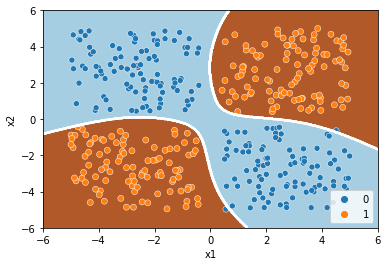

In [31]:
xx, yy = np.meshgrid(np.linspace(-6, 6, 500), np.linspace(-6, 6, 500))

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.imshow(
    Z,
    interpolation="nearest",
    extent=(xx.min(), xx.max(), yy.min(), yy.max()),
    aspect="auto",
    origin="lower",
    cmap=plt.cm.Paired
)

contours = plt.contour(xx, yy, Z, linewidths=2, colors="white")
plt.xlim(xmin, xmax)
plt.ylim(ymin, ymax)
sns.scatterplot(x="x1", y="x2", hue="y", data=df)
plt.legend(loc='lower right')
plt.show()

# Naive Bayes (Gaussian)

### Independent Features

In [32]:
df = pd.read_csv("classification_naive_bayes_bernoulli_independent.csv")
df.loc[ df["y"] == -1, "y"] = 0 
df.head()

x1        x2  y
0  0.071472 -1.328822  0
1 -0.460676 -0.217974  0
2 -1.474365 -1.406289  0
3 -1.650939  0.934005  0
4 -1.043427 -0.319130  0

In [33]:
feature_cols = ['x1', 'x2']
X = df[feature_cols].to_numpy()
y = df['y'].to_numpy()
clf = GaussianNB()
clf.fit(X, y)

GaussianNB()

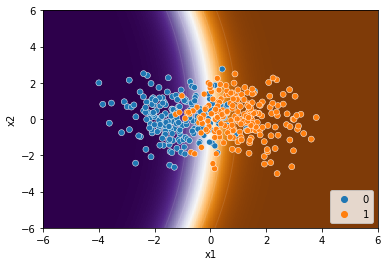

In [34]:
xmin,xmax = -6, 6
ymin,ymax = -6, 6
xx, yy = np.meshgrid(np.linspace(-6, 6, 500), np.linspace(-6, 6, 500))
Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])
Z = Z[:, 1].reshape(xx.shape)


plt.imshow(
    Z,
    interpolation="nearest",
    extent=(xx.min(), xx.max(), yy.min(), yy.max()),
    aspect="auto",
    origin="lower",
    cmap=plt.cm.PuOr_r
)


contours = plt.contour(xx, yy, Z, linewidths=1, colors="white",alpha=0.1)
plt.xlim(xmin, xmax)
plt.ylim(ymin, ymax)
sns.scatterplot(x="x1", y="x2", hue="y", data=df)
plt.legend(loc='lower right')
plt.show()

### Dependent Features

In [35]:
df = pd.read_csv("classification_dependent_feature.csv")
df.loc[ df["y"] == -1, "y"] = 0 
df.head()

x1         x2  y
0 -4.221546  17.821449  1
1 -5.444781  29.645640  1
2 -1.597306   2.551388  1
3 -1.576901   2.486618  1
4 -1.625671   2.642807  1

In [36]:
feature_cols = ['x1', 'x2']
X = df[feature_cols].to_numpy()
y = df['y'].to_numpy()
clf = GaussianNB()
clf.fit(X, y)

GaussianNB()

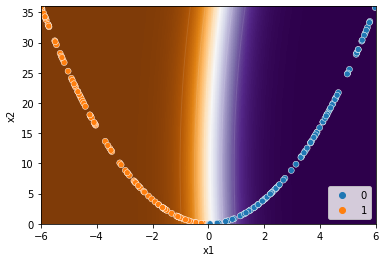

In [37]:
xmin,xmax = -6, 6
ymin,ymax = 0, 36
xx, yy = np.meshgrid(np.linspace(-6, 6, 500), np.linspace(0, 36, 500))
Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])
Z = Z[:, 1].reshape(xx.shape)


plt.imshow(
    Z,
    interpolation="nearest",
    extent=(xx.min(), xx.max(), yy.min(), yy.max()),
    aspect="auto",
    origin="lower",
    cmap=plt.cm.PuOr_r
)


contours = plt.contour(xx, yy, Z, linewidths=1, colors="white",alpha=0.1)
plt.xlim(xmin, xmax)
plt.ylim(ymin, ymax)
sns.scatterplot(x="x1", y="x2", hue="y", data=df)
plt.legend(loc='lower right')
plt.show()

# Decision Tree Classifier 

### Linearly Separable (Uniform)

In [38]:
df = pd.read_csv("classification_linear_uniform.csv")
df.loc[ df["y"] == -1, "y"] = 0 
df.head()

x1        x2  y
0  0.299134  2.291594  1
1  0.700495  0.421917  1
2  3.114521  3.489704  1
3  2.671060  1.629899  1
4  3.035790  1.318322  1

In [39]:
feature_cols = ['x1', 'x2']
X = df[feature_cols].to_numpy()
y = df['y'].to_numpy()
clf = DecisionTreeClassifier()
clf.fit(X, y)

DecisionTreeClassifier()

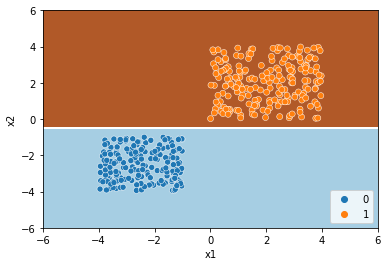

In [40]:
xmin,xmax = -6, 6
ymin,ymax = -6, 6
xx, yy = np.meshgrid(np.linspace(-6, 6, 500), np.linspace(-6, 6, 500))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.imshow(
    Z,
    interpolation="nearest",
    extent=(xx.min(), xx.max(), yy.min(), yy.max()),
    aspect="auto",
    origin="lower",
    cmap=plt.cm.Paired
)


contours = plt.contour(xx, yy, Z, linewidths=2, colors="white", alpha=1)
plt.xlim(xmin, xmax)
plt.ylim(ymin, ymax)
sns.scatterplot(x="x1", y="x2", hue="y", data=df)
plt.legend(loc='lower right')
plt.show()

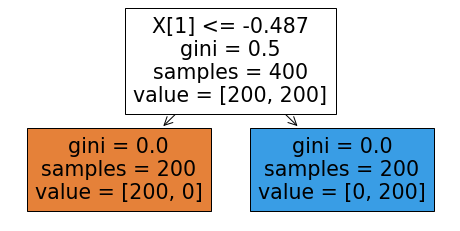

In [41]:
fig = plt.figure(figsize=(8,4))
_ = tree.plot_tree(clf, 
                   filled=True)

### Non-linear (XOR)

In [42]:
df = pd.read_csv("classification_nonlinear_xor.csv")
df.loc[ df["y"] == -1, "y"] = 0 
df.head()

x1        x2  y
0  2.415993  4.922784  1
1  4.489238  3.196620  1
2  4.935055  3.699012  1
3  1.589000  2.737612  1
4  2.112737  1.538858  1

In [43]:
feature_cols = ['x1', 'x2']
X = df[feature_cols].to_numpy()
y = df['y'].to_numpy()
clf = DecisionTreeClassifier()
clf.fit(X, y)

DecisionTreeClassifier()

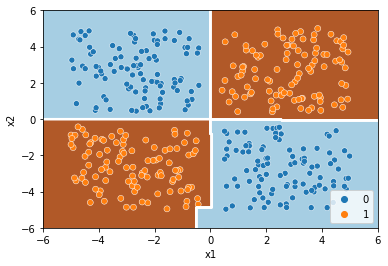

In [44]:
xmin,xmax = -6, 6
ymin,ymax = -6, 6
xx, yy = np.meshgrid(np.linspace(-6, 6, 500), np.linspace(-6, 6, 500))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.imshow(
    Z,
    interpolation="nearest",
    extent=(xx.min(), xx.max(), yy.min(), yy.max()),
    aspect="auto",
    origin="lower",
    cmap=plt.cm.Paired
)


contours = plt.contour(xx, yy, Z, linewidths=2, colors="white", alpha=1)
plt.xlim(xmin, xmax)
plt.ylim(ymin, ymax)
sns.scatterplot(x="x1", y="x2", hue="y", data=df)
plt.legend(loc='lower right')
plt.show()

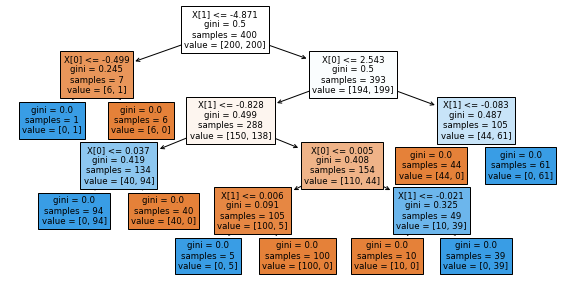

In [45]:
fig = plt.figure(figsize=(10, 5))
_ = tree.plot_tree(clf, 
                   filled=True)

# Decision Tree Regressor

### Linear Data

In [46]:
df = pd.read_csv("regression_linear_line.csv")
df.head()

x         y
0 -6.000000  5.766936
1 -5.967419  5.384906
2 -5.934837  5.344283
3 -5.902256  5.486492
4 -5.869674  5.196149

In [47]:
X = df["x"].to_numpy()
y = df["y"].to_numpy()
reg = DecisionTreeRegressor()
reg.fit(X.reshape(-1, 1), y)

DecisionTreeRegressor()

In [48]:
# fig = plt.figure(figsize=(10, 5))
# _ = tree.plot_tree(reg, 
#                    filled=True)

# K-Means Clustering 

### 2-Cluster

In [49]:
df = pd.read_csv("classification_linear_uniform.csv")
df.head()

x1        x2  y
0  0.299134  2.291594  1
1  0.700495  0.421917  1
2  3.114521  3.489704  1
3  2.671060  1.629899  1
4  3.035790  1.318322  1

In [50]:
feature_cols = ['x1', 'x2']
X = df[feature_cols].to_numpy()
clus = KMeans(n_clusters=2, random_state=42)
clus.fit(X)

KMeans(n_clusters=2, random_state=42)

[]

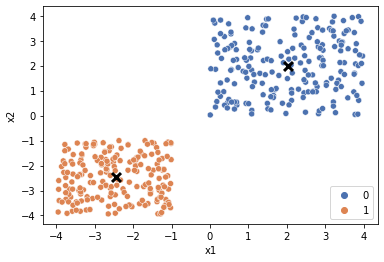

In [51]:
label = clus.fit_predict(X)
df["label"] = label
sns.scatterplot(x="x1", y="x2", hue="label", palette="deep", data=df)
centroids = clus.cluster_centers_
plt.scatter(
    centroids[:, 0],
    centroids[:, 1],
    marker="x",
    s=80,
    linewidths=3,
    color="black",
    zorder=10,
)
plt.legend(loc='lower right')
plt.plot()

### 4-Cluster

In [52]:
df = pd.read_csv("classification_nonlinear_xor.csv")
df.head()

x1        x2  y
0  2.415993  4.922784  1
1  4.489238  3.196620  1
2  4.935055  3.699012  1
3  1.589000  2.737612  1
4  2.112737  1.538858  1

In [53]:
feature_cols = ['x1', 'x2']
X = df[feature_cols].to_numpy()
clus = KMeans(n_clusters=4, random_state=42)
clus.fit(X)

KMeans(n_clusters=4, random_state=42)

[]

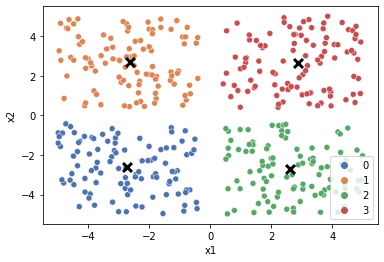

In [54]:
label = clus.fit_predict(X)
df["label"] = label
sns.scatterplot(x="x1", y="x2", hue="label", palette="deep", data=df)
centroids = clus.cluster_centers_
plt.scatter(
    centroids[:, 0],
    centroids[:, 1],
    marker="x",
    s=80,
    linewidths=3,
    color="black",
    zorder=10,
)
plt.legend(loc='lower right')
plt.plot()

### With Outliers

In [55]:
df = pd.read_csv("classification_clustering_outliers.csv")
df["x1"] = df["x"]
df["x2"] = df["y"]
df.drop(columns=["x", "y"], inplace=True)
df.head()

x1        x2
0 -3.166461  1.919370
1 -3.965074  1.173233
2 -3.366922  1.003308
3 -4.755280  0.708071
4 -4.970040  0.708572

In [56]:
feature_cols = ['x1', 'x2']
X = df[feature_cols].to_numpy()
clus = KMeans(n_clusters=2, random_state=42)
clus.fit(X)

KMeans(n_clusters=2, random_state=42)

[]

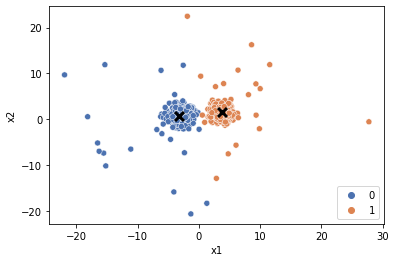

In [57]:
label = clus.fit_predict(X)
df["label"] = label
sns.scatterplot(x="x1", y="x2", hue="label", palette="deep", data=df)
centroids = clus.cluster_centers_
plt.scatter(
    centroids[:, 0],
    centroids[:, 1],
    marker="x",
    s=80,
    linewidths=3,
    color="black",
    zorder=10,
)
plt.legend(loc='lower right')
plt.plot()

# K-Medoids Clustering

### 2-Cluster 

In [58]:
df = pd.read_csv("classification_linear_uniform.csv")
df.head()

x1        x2  y
0  0.299134  2.291594  1
1  0.700495  0.421917  1
2  3.114521  3.489704  1
3  2.671060  1.629899  1
4  3.035790  1.318322  1

In [59]:
feature_cols = ['x1', 'x2']
X = df[feature_cols].to_numpy()
clus = KMedoids(n_clusters=2, random_state=42)
clus.fit(X)

KMedoids(n_clusters=2, random_state=42)

[]

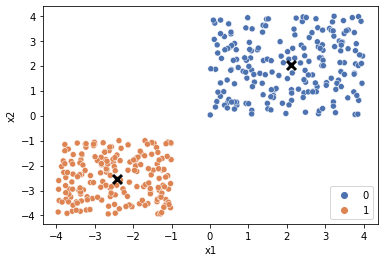

In [60]:
label = clus.fit_predict(X)
df["label"] = label
sns.scatterplot(x="x1", y="x2", hue="label", palette="deep", data=df)
centroids = clus.cluster_centers_
plt.scatter(
    centroids[:, 0],
    centroids[:, 1],
    marker="x",
    s=80,
    linewidths=3,
    color="black",
    zorder=10,
)
plt.legend(loc='lower right')
plt.plot()

### 4-Cluster

In [61]:
df = pd.read_csv("classification_nonlinear_xor.csv")
df.head()

x1        x2  y
0  2.415993  4.922784  1
1  4.489238  3.196620  1
2  4.935055  3.699012  1
3  1.589000  2.737612  1
4  2.112737  1.538858  1

In [62]:
feature_cols = ['x1', 'x2']
X = df[feature_cols].to_numpy()
clus = KMedoids(n_clusters=4, random_state=42)
clus.fit(X)

KMedoids(n_clusters=4, random_state=42)

[]

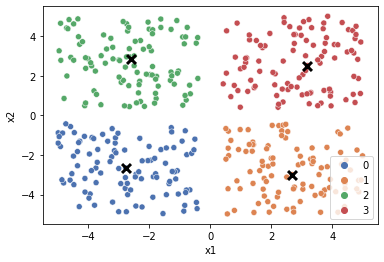

In [63]:
label = clus.fit_predict(X)
df["label"] = label
sns.scatterplot(x="x1", y="x2", hue="label", palette="deep", data=df)
centroids = clus.cluster_centers_
plt.scatter(
    centroids[:, 0],
    centroids[:, 1],
    marker="x",
    s=80,
    linewidths=3,
    color="black",
    zorder=10,
)
plt.legend(loc='lower right')
plt.plot()

### With Outliers

In [64]:
df = pd.read_csv("classification_clustering_outliers.csv")
df["x1"] = df["x"]
df["x2"] = df["y"]
df.drop(columns=["x", "y"], inplace=True)
df.head()

x1        x2
0 -3.166461  1.919370
1 -3.965074  1.173233
2 -3.366922  1.003308
3 -4.755280  0.708071
4 -4.970040  0.708572

In [65]:
feature_cols = ['x1', 'x2']
X = df[feature_cols].to_numpy()
clus = KMedoids(n_clusters=2, random_state=42)
clus.fit(X)

KMedoids(n_clusters=2, random_state=42)

[]

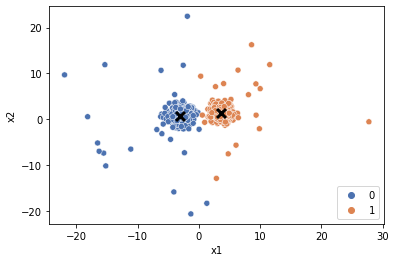

In [66]:
label = clus.fit_predict(X)
df["label"] = label
sns.scatterplot(x="x1", y="x2", hue="label", palette="deep", data=df)
centroids = clus.cluster_centers_
plt.scatter(
    centroids[:, 0],
    centroids[:, 1],
    marker="x",
    s=80,
    linewidths=3,
    color="black",
    zorder=10,
)
plt.legend(loc='lower right')
plt.plot()

# PCA

### 3D Data (Uniformly Distributed and Linearly Separable)

In [67]:
df = pd.read_csv("classification_linear_uniform.csv")
df.loc[ df["y"] == -1, "y"] = 0 
df.head()

x1        x2  y
0  0.299134  2.291594  1
1  0.700495  0.421917  1
2  3.114521  3.489704  1
3  2.671060  1.629899  1
4  3.035790  1.318322  1

In [68]:
feature_cols = ['x1', 'x2']
X = df[feature_cols].to_numpy()
y = df['y'].to_numpy()
pca = PCA()
components = pca.fit_transform(X)

In [69]:
labels = {
    str(i): f"PC {i+1} ({var:.1f}%)"
    for i, var in enumerate(pca.explained_variance_ratio_ * 100)
}

fig = px.scatter_matrix(
    components,
    labels=labels,
    dimensions=range(2),
    color=df["y"]
)
fig.update_traces(diagonal_visible=False)
fig.show()